# 크기 변환

In [2]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [1]:
import cv2
import numpy as np


def scale_nogood(img,scale_x=1,scale_y=1):
    height,width = img.shape
    img_ = np.zeros((int(height*scale_y),int(width*scale_x)),dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            try:
                img_[int(y*scale_y),int(x*scale_x)]=img[y,x]
            except:
                pass
    return img_

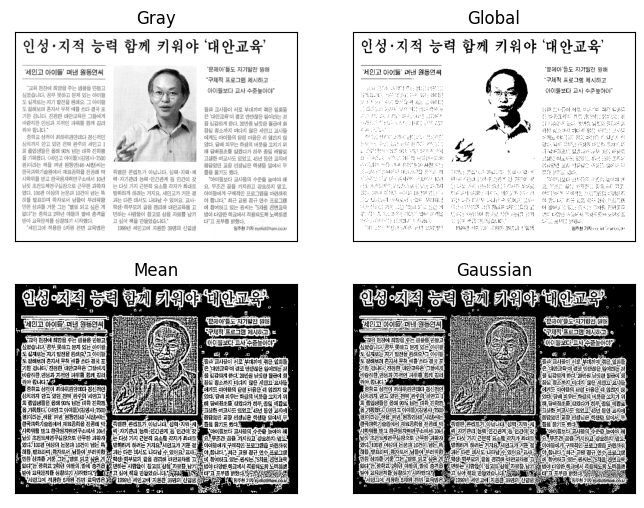

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_gray = cv2.imread('images/paper.jpg', 0)
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
adt_mean = cv2.adaptiveThreshold(img_gray, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 7, 0)
adt_gaus = cv2.adaptiveThreshold(img_gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 7, 0)
titles = ['Gray', 'Global', 'Mean', 'Gaussian']
images = [img_gray, img_bin, adt_mean, adt_gaus]
plt.figure(figsize=(8,6))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
import cv2
import numpy as np
img = cv2.imread("images/lena.jpg", cv2.IMREAD_GRAYSCALE)
result = scale_nogood(img, 0.5, 0.5)
cv2.imshow('Origin', img)
cv2.imshow('Scale NG', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 최근 방법

In [5]:
def scalee_nearest(img,scale_x=1,scale_y=1):
    height,width = img.shape
    img_ = np.zeros((int(height*scale_y),int(width*scale_x)),dtype=np.uint8)

    for y in range(height*scale_y):
        for x in range(width*scale_x):
            try:
                img_[y,x] = img[int(y/scale_y),int(x/scale_x)]
            except:
                pass
    return img_

# 선형방법

In [6]:
def scale_bilinear(img,scale_x=1,scale_y=1):
    height,width = img.shape
    img_ = np.zeros((int(height*scale_y),int(width*scale_x)),dtype=np.uint8)
    for y in range(int(height*scale_y)):
        for x in range(int(width*scale_y)):
            p = x/scale_x-int(x/scale_x)
            q = y/scale_y-int(y/scale_y)
            try:
                X = int(x/scale_x)
                Y = int(y/scale_y)
                value = (1-p)*(1-q)*img[Y,X] + [*(1-q)*img[Y+1,X]\
                    + (1-p)*q*img[Y,X+1]+ p*q*img[Y+1,X+1]]
                if value > 255:
                    img_[y,x] = 255
                else:
                    img_[y,x]= int(value)
            except:
                pass
    return img_

# Contours()

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/shape.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,bin_img = cv2.threshold(imgray,127,255,0)

contours,hierachy = cv2.findContours(bin_img,
                                    cv2.RETR_TREE,
                                    cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(img,contours,-1,(0,255,0),3)

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()